# Práctico 1

En este práctico, correspondiente a la primera mitad de la materia, trabajaremos con un dataset extraído de Twitter. La idea es emplear los conceptos de grafos vistos en clase sobre un caso real de actualidad.

## Dataset

El dataset consiste en un conjunto de hilos de tweets, con un total de ~150000 tweets, extraídos entre Enero y Marzo de 2021. La temática de los mismos está referida a la vacunación contra el covid-19 en Argentina.

Pueden descargar el dataset del siguiente [link](https://drive.google.com/file/d/1X_qKsE8muAnom2tDX4sLlmBAO0Ikfe_G/view?usp=sharing).

### Campos

- **created_at:** Fecha del tweet
- **id_str:** ID del tweet
- **full_text:** Contenido del tweet
- **in_reply_to_status_id:** ID del tweet inmediatamente anterior en el hilo
- **in_reply_to_user_id:** Autor del tweet inmediatamente anterior en el hilo
- **user.id:** Autor del tweet
- **user_retweeters:** Lista de ID de usuarios que retweetearon el tweet
- **sentiment:** Etiquetado manual que indica el sentimiento o intención del tweet con respecto al tweet anterior en el hilo

## Configuración inicial

In [1]:
import pandas as pd
from pathlib import Path

## Descargar el csv con los datos en este directorio
DATA_DIR = Path('../data/twitter')
INPUT_FILE = DATA_DIR / 'vacunas.csv'

## Creamos el directorio en caso de que no exista
DATA_DIR.mkdir(parents=True, exist_ok=True)

### Cargamos el dataset

In [2]:
dtypes = {
    'id_str': str,
    'full_text': str,
    'in_reply_to_status_id': str,
    'in_reply_to_user_id': str,
    'user.id': str
}
df = pd.read_csv(INPUT_FILE, dtype=dtypes).dropna(subset=['user_retweeters'])
df['user_retweeters'] = df['user_retweeters'].apply(lambda x: [str(elem) for elem in eval(x)])
print(df.shape)
df.head()

(155123, 8)


,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,"[2258074658, 159909978, 105301854, 290671142, ...",NaN
1,Sat Feb 20 03:19:59 +0000 2021,1362965193509265417,@Clon_43 @norabar Nora estaba indignada porque...,1362962469749153792,2737379453,32718111,[],NaN
2,Mon Feb 22 23:55:08 +0000 2021,1364000806740111363,"Bueno, Alberto dijo Salud o Economía. La salud...",NaN,NaN,252168075,"[1238117630696972289, 37232479, 12792246571247...",NaN
3,Tue Feb 23 00:09:14 +0000 2021,1364004354374696963,@spitta1969 Tuit del mes Spitta,1364000806740111363,252168075,1156346340802224128,[],NaN
4,Tue Feb 23 00:00:17 +0000 2021,1364002100364128260,@spitta1969 Estas onfire,1364000806740111363,252168075,153663816,[],NaN


### Observamos algunos ejemplos

In [3]:
idx = 0
print('Texto:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Texto: Seguimos esperando el comunicado de @norabar repudiando la situación respecto del gobierno y el tema vacunas. Seamos pacientes que con esto de la pandemia anda con mucho "laburo".
Retweets: 9


In [4]:
idx = 376
print('Text:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Text: Todo lo que hay que entender sobre la decisión –o no– de poner más vacunas en más brazos (por ejemplo, usar las 1º dosis en muchos y si es necesario retrasar la 2º) está en esta excelente nota de Nora Bär. https://t.co/A0I03DyxgO
Retweets: 48


### Calculamos la cantidad de hilos

In [5]:
roots = df[df['in_reply_to_user_id'].isna()]
roots.shape

(3174, 8)

## Actividades

### **1. Construcción del grafo** 

Construir el **grafo de retweets**, definido de la siguiente manera:

- Tipo de grafo: Dirigido
- Nodos: ID de los usuarios
- Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A

Con estos datos, el grafo debería tener alrededor de 40000 nodos y 90000 enlaces.

Considerar la versión no dirigida del grafo y estudiar su conectividad. Si existe una única "componente gigante", realizar el resto de las actividades sobre ella, en lugar de sobre el grafo completo.

Calcular las siguientes métricas globales del grafo:

- Grado medio
- Asortatividad
- Transitividad
- Coeficiente de clustering de Watts-Strogatz

**Opcional:** Comparar las métricas calculadas anteriormente con las de un grafo aleatorio con la misma distribución de grado. Pueden utilizar para ello este [método](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html?highlight=configuration#networkx.generators.degree_seq.configuration_model). Con esto en mente, comentar si los valores obtenidos anteriormente difieren significativamente del caso aleatorio.


### **2. Centralidad**

Calcular 5 métricas de centralidad de nodos. Graficar la distribución de cada una de ellas ¿Existe alguna correlación entre las distintas centralidades? 

Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?

**Opcional:** Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

### **3. Comunidades**

Utilizar el algoritmo de Louvain con el parámetro "resolución" igual a 1. Caracterizar las comunidades halladas (cantidad, distribución de tamaños). Utilizar la modularidad y otras dos métricas a elección para evaluar la calidad de la partición encontrada. 

Variar el parámetro "resolución" y observar cómo cambia la distribución de comunidades encontradas. ¿Existe algún valor para el cual se identifiquen dos grandes comunidades?

Elegir otro algoritmo de detección de comunidades y comparar los resultados con los obtenidos anteriormente.

**Opcional:** Correr el algoritmo de Louvain con distintas semillas aleatorias. Utilizar alguna métrica de comparación externa entre las particiones obtenidas para determinar en qué medida depende el algoritmo de la condición inicial.



## **1. Construcción del grafo** 

Construir el **grafo de retweets**, definido de la siguiente manera:

- Tipo de grafo: Dirigido
- Nodos: ID de los usuarios
- Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A

Con estos datos, el grafo debería tener alrededor de 40000 nodos y 90000 enlaces.

Considerar la versión no dirigida del grafo y estudiar su conectividad. Si existe una única "componente gigante", realizar el resto de las actividades sobre ella, en lugar de sobre el grafo completo.



In [6]:
import networkx as nx
import igraph as ig

import matplotlib.pyplot as plt
import numpy as np
from time import time

In [7]:
# Creamos el grafo vacio
G = nx.Graph()

In [8]:
# Obtenemos los nodos
nodes = df['user.id'].tolist()

In [9]:
df_isna = df.isna().sum()
df_isna.sort_values(ascending=False)

sentiment                154094
in_reply_to_status_id      3289
in_reply_to_user_id        3174
created_at                    0
id_str                        0
full_text                     0
user.id                       0
user_retweeters               0
dtype: int64

In [10]:
df.shape

(155123, 8)

In [11]:
len(nodes)

155123

In [12]:
# Generamos los edges según el criterio solicitado en el práctico
edges = df.apply( lambda row : [( row['user.id'] , v ) for v in row['user_retweeters']] ,  axis=1 )

In [13]:
edges

0         [(2737379453, 2258074658), (2737379453, 159909...
1                                                        []
2         [(252168075, 1238117630696972289), (252168075,...
3                                                        []
4                                                        []
                                ...                        
163174                                                   []
163175                                                   []
163176                                                   []
163177                                                   []
163178                                                   []
Length: 155123, dtype: object

In [14]:
G.add_nodes_from(nodes)

In [15]:
for edge in edges:
    #if (len(edge) > 0 ):
    G.add_edges_from(edge)

In [16]:
print(nx.info(G))

Graph with 65934 nodes and 93404 edges


Los valores obtenidos contemplan nados que no tienen ningun tipo de enlace. Vamos a descartar esos nodos y nos quedamos con los nodos que tienen conecciones a otros nodos. 

In [17]:
# Creamos el grafo vacio
G = nx.Graph()

In [18]:
for edge in edges:
    #if (len(edge) > 0 ):
    G.add_edges_from(edge)

In [19]:
print(nx.info(G))

Graph with 39800 nodes and 93404 edges


### Calcular las siguientes métricas globales del grafo:

- Grado medio
- Asortatividad
- Transitividad
- Coeficiente de clustering de Watts-Strogatz

**Opcional:** Comparar las métricas calculadas anteriormente con las de un grafo aleatorio con la misma distribución de grado. Pueden utilizar para ello este [método](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html?highlight=configuration#networkx.generators.degree_seq.configuration_model). Con esto en mente, comentar si los valores obtenidos anteriormente difieren significativamente del caso aleatorio.

In [20]:

%time deg_seq = np.array([k for v, k in G.degree()])
# df['degree'] = deg_seq

averg = sum(deg_seq) / len(deg_seq)

CPU times: user 21.8 ms, sys: 411 µs, total: 22.2 ms
Wall time: 22.1 ms


In [21]:
%time assortativity = nx.degree_pearson_correlation_coefficient(G)

CPU times: user 992 ms, sys: 77.5 ms, total: 1.07 s
Wall time: 1.1 s


In [22]:
%time transitivity = nx.transitivity(G)

CPU times: user 15.3 s, sys: 233 ms, total: 15.6 s
Wall time: 13 s


In [23]:
%time avg_clustering = nx.average_clustering(G)


CPU times: user 13 s, sys: 16.9 ms, total: 13 s
Wall time: 13 s


In [24]:
print (f"Grado medio {averg}")
print (f"Asortatividad { assortativity }")
print (f"Transitividad {transitivity}")
print (f"Coeficiente clustering {avg_clustering}")


Grado medio 4.693668341708543
Asortatividad -0.22131902542941567
Transitividad 0.0016125612488585316
Coeficiente clustering 0.09990623904532091


## **2. Centralidad**

Calcular 5 métricas de centralidad de nodos. Graficar la distribución de cada una de ellas ¿Existe alguna correlación entre las distintas centralidades? 

Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?

**Opcional:** Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

### Calcular 5 métricas de centralidad de nodos. Graficar la distribución de cada una de ellas ¿Existe alguna correlación entre las distintas centralidades?

In [25]:
# Netoworkx no performa bien calculando algunas medidas de centralidad, es por ello que se prueba con igraph

g_ig = ig.Graph.TupleList(G.edges())
print(g_ig.summary())

IGRAPH UN-- 39800 93404 -- 
+ attr: name (v)


In [26]:
df_metrics = g_ig.get_vertex_dataframe()

In [27]:
df_metrics

,name
vertex ID,
0,2737379453
1,2258074658
2,159909978
3,105301854
4,290671142
...,...
39795,1311418268205428739
39796,2650545267
39797,391590171


In [28]:
# Una alternativa para calcular el betweenness con networkx es reducir la cantidad de nodos a utilizar por cada 
# estadistico de betweenness de cada nodo. Si bien esto acelera el proceso, el valor obtenido no es tan preciso
# como si utilizaramos todos los nodos. Dejamos esto comentado puesto que avanzamos con igraph.

# betweenness = nx.betweenness_centrality(G , k = 100 )

In [29]:
%time btw = g_ig.betweenness()

CPU times: user 1min 17s, sys: 511 ms, total: 1min 17s
Wall time: 1min 17s


In [30]:
df_metrics['btw'] = btw

In [31]:
%time closeness = g_ig.closeness()


CPU times: user 46.3 s, sys: 307 ms, total: 46.6 s
Wall time: 46.3 s


In [32]:
df_metrics['closeness']  = closeness

In [33]:
%time degree = g_ig.degree()

CPU times: user 249 µs, sys: 4 µs, total: 253 µs
Wall time: 256 µs


In [34]:
df_metrics['degree'] = degree

In [35]:
%time eigenvector_centrality = g_ig.eigenvector_centrality()

CPU times: user 96.6 ms, sys: 2.49 ms, total: 99.1 ms
Wall time: 98.9 ms


In [36]:
df_metrics['eigenvector_centrality'] = eigenvector_centrality

In [37]:
%time page_rank = g_ig.pagerank()

CPU times: user 39.4 ms, sys: 800 µs, total: 40.2 ms
Wall time: 40.1 ms


In [38]:
df_metrics['page_rank'] = page_rank

In [39]:
%time har_centr = g_ig.harmonic_centrality()

CPU times: user 45.2 s, sys: 309 ms, total: 45.5 s
Wall time: 45.2 s


In [40]:
df_metrics['har_centr'] = har_centr

In [41]:
df_metrics

,name,btw,closeness,degree,eigenvector_centrality,page_rank,har_centr
vertex ID,,,,,,,
0,2737379453,78111.640852,0.244898,9,7.483957e-04,0.000038,0.250772
1,2258074658,130535.561685,0.286305,19,9.090829e-03,0.000070,0.307703
2,159909978,0.000000,0.196722,1,7.490374e-06,0.000007,0.198210
3,105301854,31376.713412,0.304398,10,1.069571e-02,0.000036,0.325685
4,290671142,291383.100735,0.308014,15,1.193750e-02,0.000056,0.329096
...,...,...,...,...,...,...,...
39795,1311418268205428739,0.000000,0.166180,1,6.266713e-08,0.000011,0.165806
39796,2650545267,0.000000,0.182163,1,1.736447e-06,0.000009,0.184600
39797,391590171,0.000000,1.000000,1,0.000000e+00,0.000025,0.000025


In [42]:
import seaborn as sns
from sklearn import preprocessing

In [43]:
df_metrics['btw_0_1'] = preprocessing.minmax_scale(df_metrics['btw'], feature_range=(0, 1), axis=0, copy=True)

/usr/local/anaconda3/envs/graphML_37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


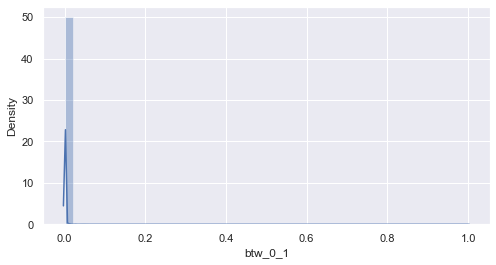

In [44]:
sns.set(rc={"figure.figsize": (8, 4)}); 
x = df_metrics['btw_0_1']
ax = sns.distplot(x)
plt.show()

/usr/local/anaconda3/envs/graphML_37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


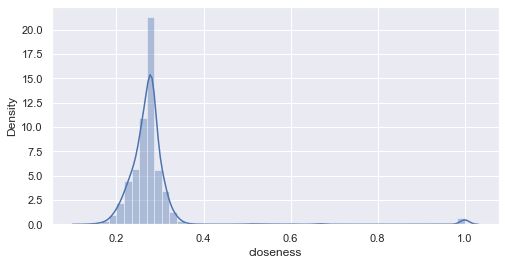

In [45]:
sns.set(rc={"figure.figsize": (8, 4)});
x = df_metrics['closeness']
ax = sns.distplot(x)
plt.show()

In [46]:
df_metrics['degree_0_1'] = preprocessing.minmax_scale(df_metrics['degree'], feature_range=(0, 1), axis=0, copy=True)

/usr/local/anaconda3/envs/graphML_37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


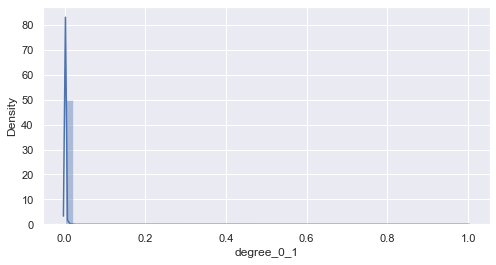

In [47]:
sns.set(rc={"figure.figsize": (8, 4)}); 
x = df_metrics['degree_0_1']
ax = sns.distplot(x)
plt.show()

/usr/local/anaconda3/envs/graphML_37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


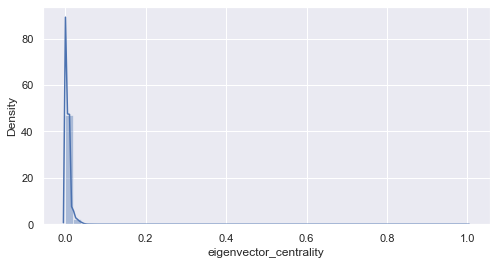

In [48]:
sns.set(rc={"figure.figsize": (8, 4)}); 
x = df_metrics['eigenvector_centrality']
ax = sns.distplot(x)
plt.show()

/usr/local/anaconda3/envs/graphML_37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


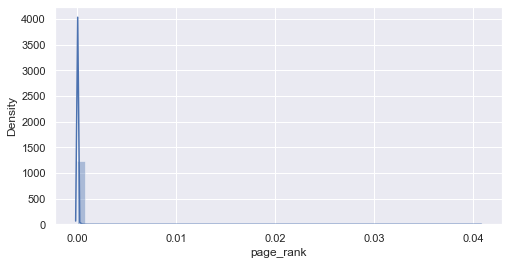

In [49]:
sns.set(rc={"figure.figsize": (8, 4)});
x = df_metrics['page_rank']
ax = sns.distplot(x)
plt.show()

/usr/local/anaconda3/envs/graphML_37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


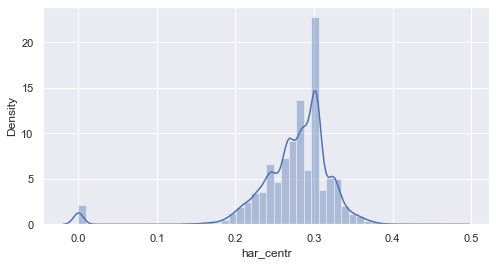

In [50]:
sns.set(rc={"figure.figsize": (8, 4)}); 
x = df_metrics['har_centr']
ax = sns.distplot(x)
plt.show()

**Se puede obsercar que *betweenness*, *degree* y *eigenvector_centrality* tiene distribuciones similares (en el caso de betweenness y degree las escalamos a valores 0 ,1)**

### Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?


In [51]:
def get_top_usrs_by_metrics(columns, top_n , df ):
   
    data = {}
    for col in columns:
        top_families = df.nlargest(top_n, columns=[col])[col].index
        data[col] = top_families
    return pd.DataFrame(data)

In [52]:
columns = ['btw', 'closeness', 'degree', 'eigenvector_centrality', 'page_rank', 'har_centr']

df_top_by_metrics = get_top_usrs_by_metrics(columns, 10 , df_metrics)


In [53]:
df_top_by_metrics

,btw,closeness,degree,eigenvector_centrality,page_rank,har_centr
0,13,29638,13,13736,13,13
1,13736,29656,13736,8398,13736,13736
2,8398,29657,8398,13,8398,8398
3,13740,30425,11454,11454,13740,11454
4,30,30426,13740,13159,11454,4511
5,11454,30657,13159,13740,13159,30
6,13159,30954,30,13739,13734,6910
7,13734,30955,13734,13734,30,7977
8,13739,31274,13739,30,13739,2775
9,59,31275,13738,9068,13738,13159


**Se nota una fuerte conicidencia entre los top 4 (del 0 - 3)**

In [54]:
df_metrics.iloc[[13,13736,8398 , 11454]]

,name,btw,closeness,degree,eigenvector_centrality,page_rank,har_centr,btw_0_1,degree_0_1
vertex ID,,,,,,,,,
13,252168075,2.703364e+08,0.392229,8207,0.738339,0.040722,0.478310,1.000000,1.000000
13736,130979339,1.785181e+08,0.398115,5553,1.000000,0.033187,0.457576,0.660355,0.676578
8398,73102744,1.259533e+08,0.371290,5362,0.972362,0.030866,0.434693,0.465913,0.653302
11454,367933714,9.179453e+07,0.382177,3849,0.715609,0.021966,0.431454,0.339557,0.468925


In [55]:
df[df['user.id'] == '252168075' ]

,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
2,Mon Feb 22 23:55:08 +0000 2021,1364000806740111363,"Bueno, Alberto dijo Salud o Economía. La salud...",NaN,NaN,252168075,"[1238117630696972289, 37232479, 12792246571247...",NaN
422,Wed Mar 10 18:32:02 +0000 2021,1369717701002866690,No Kichi: no fue una espantosa campaña anti va...,NaN,NaN,252168075,"[92138339, 175236893, 1280585875131437067, 111...",NaN
466,Wed Mar 10 18:32:42 +0000 2021,1369717867957125123,Un economista y una doctora en letras. Por dio...,1369717701002866690,252168075,252168075,"[2870052210, 1334687222, 2989938288, 835122943...",NaN
561,Thu Feb 25 12:17:32 +0000 2021,1364912411778686979,"Ah, pero Piñeyra! No como nuestro gobierno de ...",NaN,NaN,252168075,"[860360141350334464, 896803531872755713, 67046...",NaN
726,Sat Feb 20 15:12:08 +0000 2021,1363144411148918790,El colmo de la corrupción es robar vacunas cuy...,NaN,NaN,252168075,"[1070459253692030976, 1348710270194102273, 225...",NaN
...,...,...,...,...,...,...,...,...
161746,Fri Jan 22 10:28:52 +0000 2021,1352563879067459585,Esto de pelear conta la Inquisición se está po...,NaN,NaN,252168075,"[1343316321585475585, 4818806993, 894886118608...",NaN
161757,Wed Feb 03 23:35:28 +0000 2021,1357110485729034241,"Si, claro. Y también piden tu pelopincho. http...",NaN,NaN,252168075,"[185616425, 527736823, 1210378599238422528, 86...",NaN
161886,Tue Jan 12 19:16:45 +0000 2021,1349072844710412288,"""Researchers worry that efforts to free up lim...",NaN,NaN,252168075,"[312707665, 1250159023472685064, 73084144, 122...",NaN
161953,Fri Jan 01 22:51:18 +0000 2021,1345140571699077120,La mina que grita me resulta tan truchex. Mas ...,NaN,NaN,252168075,"[1056968725168115714, 1208538869286744065, 101...",NaN


In [56]:
df[df['user.id'] == '130979339' ]

,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
405,Mon Jan 04 20:06:41 +0000 2021,1346186309560389633,"Situación desesperante en Los Angeles, EEUU, d...",NaN,NaN,130979339,"[131329344, 2826122264, 273180114, 226561190, ...",NaN
852,Sun Feb 28 14:17:37 +0000 2021,1366029795868479488,Descubrieron un árbol petrificado en Lesbos de...,NaN,NaN,130979339,"[1210368056020656133, 891804290737737728, 1503...",NaN
857,Thu Mar 11 17:32:03 +0000 2021,1370064994298126339,Otra variante del coronavirus identificada en ...,NaN,NaN,130979339,"[3411303407, 1210368056020656133, 147755622, 7...",NaN
1017,Mon Mar 01 20:10:52 +0000 2021,1366481082124800004,"Los datos de hoy, 1/3/21. Reporte de Covid del...",NaN,NaN,130979339,"[201586229, 271730974, 723523358, 994364330, 1...",NaN
1028,Mon Mar 01 20:12:23 +0000 2021,1366481462799835141,Por provincia (notificados hoy/acumulados) 👇 h...,1366481343169908745,130979339,130979339,"[201586229, 271730974, 1183088013871669255, 12...",NaN
...,...,...,...,...,...,...,...,...
162688,Mon Mar 15 20:46:04 +0000 2021,1371563369455554563,🏴 Fallecidos hasta hoy: 53.836\n🏴En las última...,1371563309888122894,130979339,130979339,"[1210368056020656133, 189681351, 1241413268062...",NaN
162691,Mon Mar 15 20:46:30 +0000 2021,1371563480667586562,"Por provincia, notificados hoy/acumulados 👇 ht...",1371563369455554563,130979339,130979339,"[271730974, 1210368056020656133, 186670739, 18...",NaN
162710,Tue Jan 12 12:09:50 +0000 2021,1348965408624304128,"""Se vacunará con las dos dosis de la vacuna co...",NaN,NaN,130979339,"[1081950707585036291, 753003701892157440, 7561...",NaN
162947,Tue Jan 12 13:25:56 +0000 2021,1348984558239305731,"@MartaHerrera76 No es pública. Hasta ahora, hu...",1348983974538973184,1976434717,130979339,[],NaN


In [57]:
df[df['user.id'] == '73102744' ]

,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
39,Sun Feb 28 23:51:37 +0000 2021,1366174247425556483,Argentina tiene hoy casi 18 muertos por millón...,NaN,NaN,73102744,"[178105343, 2644056245, 4196856351, 215547565,...",NaN
107,Mon Mar 01 05:09:45 +0000 2021,1366254308426207232,@arroadri Inevitable a menos que se aceleren l...,1366218359730241543,171893542,73102744,[1083825689848135680],NaN
111,Mon Mar 01 00:53:09 +0000 2021,1366189731235643394,"@jadagui un rato, me cayeron los violentos",1366184037543460865,139058257,73102744,[],NaN
114,Mon Mar 01 12:17:42 +0000 2021,1366362007063117827,@PTorricos Precisamente y cuidadosamente dije ...,1366357963099750404,1233442742312865792,73102744,[],NaN
116,Mon Mar 01 02:43:39 +0000 2021,1366217542889598977,@Horacio86925173 Puse candado para evitar a lo...,1366185744574930944,1351278834147069953,73102744,[],NaN
...,...,...,...,...,...,...,...,...
160772,Wed Feb 03 03:20:14 +0000 2021,1356804663136448517,@inalomazzi ❤️,1356796506225926146,139456874,73102744,[],NaN
160774,Wed Feb 03 03:41:48 +0000 2021,1356810090100187136,@lavronsky ❤️,1356776545822597120,117077976,73102744,[],NaN
160791,Wed Feb 03 03:38:06 +0000 2021,1356809158100733958,"@HumbertoCisale Claro, debe pensar que es como...",1356782804328144896,1207662978205663233,73102744,"[158007051, 885810670717079552, 19625528, 3263...",NaN
160794,Wed Feb 03 03:28:29 +0000 2021,1356806741070143489,@HugoBlancoHB 🥰,1356794901317509128,1954572703,73102744,[],NaN


In [58]:
df[df['user.id'] == '367933714' ]

,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
341,Mon Mar 01 16:00:32 +0000 2021,1366418082961448963,@pimboleto @ernestorr 7 millones entre &gt;70 ...,1366231625361719298,133115327,367933714,"[2601817933, 712039945695862790]",NaN
344,Mon Mar 01 17:26:45 +0000 2021,1366439780440043525,@pimboleto @ernestorr Yo firmo por 8,1366429656824631299,133115327,367933714,[],NaN
515,Tue Mar 16 16:40:27 +0000 2021,1371863948346195973,Adolfo muy seriamente aborda la situación de B...,NaN,NaN,367933714,"[1344669664568356865, 2601817933, 836922686852...",NaN
536,Tue Mar 16 16:47:35 +0000 2021,1371865742644232197,@tomaydale Uno espera infructuosamente cierta ...,1371864977376706561,331232046,367933714,[],NaN
541,Tue Mar 16 17:15:26 +0000 2021,1371872748826464260,"@riverapomar @tomaydale Hola Rolando, no era s...",1371870371071332356,3378198736,367933714,[],NaN
...,...,...,...,...,...,...,...,...
161943,Tue Jan 12 21:53:03 +0000 2021,1349112177639223298,"@hbarugel Por otro lado, cuándo vamos a tener ...",1349112013323173889,367933714,367933714,[],NaN
162144,Tue Mar 09 19:46:55 +0000 2021,1369374156966555648,Les pido una firma y un RT por Ernesto.\n\n@er...,NaN,NaN,367933714,"[1295419630765387777, 895383480053444609, 6413...",NaN
162261,Tue Mar 09 22:03:46 +0000 2021,1369408598313435142,@GuilledAnillaco @beabusaniche @ernestorr Erne...,1369393118244659203,2460488124,367933714,[],NaN
162286,Tue Mar 09 21:32:29 +0000 2021,1369400722706608136,"@mellevaelhuayra @ernestorr No me sorprende, l...",1369391726088097793,43167904,367933714,"[1228849782187319298, 500269004]",NaN


In [59]:
#!conda install -y -c conda-forge tweepy 

In [60]:
import tweepy 


def init_api(consumer_key, consumer_secret, access_token, access_token_secret):
      # authorization of consumer key and consumer secret
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

    # set access to user's access key and access secret 
    auth.set_access_token(access_token, access_token_secret)

    # calling the api 
    api = tweepy.API(auth)

    return api
    
def get_user_tweets(consumer_key, consumer_secret, access_token, access_token_secret , user_id , tweets_count = 50):
    
    api = init_api(consumer_key, consumer_secret, access_token, access_token_secret)
  

    user = api.get_user(user_id = user_id)
    

    tweets = api.user_timeline(user_id=user_id, 
                               # 200 is the maximum allowed count
                               count=tweets_count,
                               include_rts = False,
                               # Necessary to keep full_text 
                               # otherwise only the first 140 words are extracted
                               tweet_mode = 'extended'
                               )

    for info in tweets:
        print("ID: {}".format(info.id))
        print(info.created_at)
        print(info.full_text)
        print("\n")
    
    
def desribe_user(consumer_key, consumer_secret, access_token, access_token_secret , user_id):

    api = init_api(consumer_key, consumer_secret, access_token, access_token_secret)
    
    user = api.get_user(user_id = user_id)

    print (f"User id {user_id} es {user.name}")
    print (f"Cantidad de folowers {user.followers_count}")
    print (f"Descripción : {user.description}")
    

In [61]:
# Dejo esto en blanco para no publicar mis secrets. En el caso de querer correr el notebook, se deben crear los keys, 
# tokens y screts

consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

In [62]:
desribe_user(consumer_key, consumer_secret, access_token, access_token_secret, 252168075 )

User id 252168075 es Sandra Pitta
Cantidad de folowers 94566
Descripción : Candidata a Diputada Nacional; Farmacéutica/Biotecnóloga; Una Mafalda actual. #RecuperemosArgentina


**En el caso de Sandra Pitta, obteniendo datos de su usuario usando la API de twitter, se puede apreciar  que forma parte de la oposición al gobierno. Esto se ve claro en la descripción que obtenemos de twitter que dice #RecuperemosArgentina. En los tweets se puede ver que esta a favor de la vacunación.**

In [63]:
desribe_user(consumer_key, consumer_secret, access_token, access_token_secret, 130979339 )

User id 130979339 es Nora Bär
Cantidad de folowers 140139
Descripción : Ex editora de Ciencia y Salud en La Nación. Ahora, en @eldestapeweb. "Rebelión en el Laboratorio" y "Diez preguntas que la ciencia (todavía) no puede contestar"


In [64]:
get_user_tweets(consumer_key, consumer_secret, access_token, access_token_secret , 130979339)

ID: 1465419138785026048
2021-11-29 20:35:23+00:00
🚩Por provincia, notificados hoy/acumulados👇 https://t.co/0Yf0VlrQPT


ID: 1465419081922891779
2021-11-29 20:35:09+00:00
🏴Detalle de las muertes reportadas en las últimas 24 hs👇 https://t.co/h6wfOBENJr


ID: 1465419009449504768
2021-11-29 20:34:52+00:00
Llegaron los datos de hoy, 29/11/21. Reporte diario de Covid del @msalnacion 👇
🚩1968 notificados; 🖤25 fallecidos
🔬TESTS del día: 41.826
🛌614 personas en terapia
🛌Ocupación UTIs: Nación 35,1%; AMBA 39,5%
🏴Fallecidos hasta hoy: 116.554 https://t.co/aJAK36PvRB


ID: 1465392016674672640
2021-11-29 18:47:37+00:00
@JRacinguistaa En principio, no, porque se hacen análisis genómicos y hasta ahora no había sido detectada


ID: 1465369271937253383
2021-11-29 17:17:14+00:00
Acerca del crucero "Hamburg" 👇 https://t.co/Mk0BelKTp6


ID: 1465331874050588672
2021-11-29 14:48:37+00:00
"La emergencia de Omicron debería recordarnos lo peligrosa y precaria que es nuestra situación. Deberíamos estar muy alert

**En el caso de Nora Bär, obteniendo datos de su usuario usando la API de twitter, un conociendo un poco de los medios de comunicación, se puede ver que esta a favor del gobierno. Esto se ve claron en la descripción que obtenemos de twitter que dice "ahora, en @eldestapeweb". Analizando algunos de sus tweets, se puede ver que esta a favor de la vacunación**

In [65]:
desribe_user(consumer_key, consumer_secret, access_token, access_token_secret, 73102744 )

User id 73102744 es Ernesto Resnik
Cantidad de folowers 86597
Descripción : Científico. Biólogo Molecular/Inmunólogo/Biotecnólogo (Anticuerpos monoclonales). (Personal acct doesn't reflect my employer)


In [66]:
get_user_tweets(consumer_key, consumer_secret, access_token, access_token_secret , 73102744)

ID: 1465401729428725770
2021-11-29 19:26:12+00:00
@NazaMerlo @etupito @jpsorin6 @Tutehumor @virusolari @AndrealebuPJ ❤️


ID: 1465388358587269122
2021-11-29 18:33:04+00:00
@EloinFirenze Que no sea! Y si es, ya ves, un resfrío. 💪🏻 vacunas


ID: 1465387433487384595
2021-11-29 18:29:24+00:00
@prolejsoy No, ya tenemos inmunidad, aún si está variante fuera muy distinta algo de inmunidad igual tenemos


ID: 1465387109389324294
2021-11-29 18:28:07+00:00
@Daniel85285494 Sirven


ID: 1465386821957951490
2021-11-29 18:26:58+00:00
@amilcarBoca Gracias por ilustrar lo que es un zombie. Llamo zombies a los que como vos siguen hablando de fase 3 sin saber lo qué es y sin entender que con lo que sabemos alcanza con otros tipos de estudios. 🧟‍♀️🧟‍♂️


ID: 1465386210633949195
2021-11-29 18:24:32+00:00
@adrian_roitberg Tal cual, esto va a seguir por un tiempo si no logramos vacunar a todos


ID: 1465386050851942402
2021-11-29 18:23:54+00:00
@_L4C_ Claro, cambia la proteína. Omicron tiene 32 cambios


ID

**En el caso de Ernesto Resnik, su posición es a favor de la vacunación " negar la necesidad de vacunas no me parece respetable"**

In [67]:
desribe_user(consumer_key, consumer_secret, access_token, access_token_secret, 367933714 )

User id 367933714 es Rodrigo Quiroga
Cantidad de folowers 43043
Descripción : Bioquímico, Dr. en Cs Químicas, dedicado a la bioinformática. Docente en la FCQ-UNC. Investigador CONICET. Tuiteo sobre política, ciencia y análisis de datos.


In [68]:
get_user_tweets(consumer_key, consumer_secret, access_token, access_token_secret , 367933714)

ID: 1465409252940558339
2021-11-29 19:56:06+00:00
@juli_bg_bs @ENirenberg This effectively seems to be reporting date. Daily fluctuations are very common, with major drops in reported case numbers on weekends and sometimes also fridays. If you check downloadable NICD data, which seems to be by diagnostic date, there is no observable drop in cases.


ID: 1465404110723862541
2021-11-29 19:35:40+00:00
@carlosfacciano No hace falta cerrar Ezeiza, simplemente hacer cumplir el aislamiento obligatorio de 7 días al ingresar al país.


ID: 1465402760224980992
2021-11-29 19:30:18+00:00
@fdarenas @mariofitzm @infobae Pareciera que hablamos idiomas diferentes. No defendí nada, dije q es falso q "dejaran bajar personas por error porque se confundieron donde queda Cabo Verde", porque el viernes no existía aún la decisión administrativa que permitiera implementar restricciones para África.


ID: 1465400524136755205
2021-11-29 19:21:25+00:00
@fdarenas @mariofitzm @infobae Simplemente estoy diciendo qu

**Rodrigo Quiroga también esta a favor de la vacunación "*Seguir vacunando"**

In [69]:
#grouped = df.groupby('user.id', sort=False)['user.id'].count()


grouped = df.groupby(['user.id'] , as_index=False).agg({'id_str': ['count']})
sorted_values = grouped.sort_values(by=[('id_str' , 'count')],ascending = False).reset_index()
sorted_values.drop(['index'], axis = 1, inplace = True )
sorted_values

/usr/local/anaconda3/envs/graphML_37/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,user.id,id_str
,,count
0,73102744,2195
1,252168075,1953
2,130979339,1061
3,2687724840,893
4,367933714,782
...,...,...
42232,179919209,1
42233,179915251,1
42234,179905452,1


In [70]:
sorted_values[sorted_values['user.id'] == '252168075' ]

,user.id,id_str
,,count
1,252168075,1953


In [71]:

sorted_values[sorted_values['user.id'] == '130979339' ]

,user.id,id_str
,,count
2,130979339,1061


In [72]:

sorted_values[sorted_values['user.id'] == '73102744' ]

,user.id,id_str
,,count
0,73102744,2195


In [73]:
sorted_values[sorted_values['user.id'] == '105301854' ]

,user.id,id_str
,,count
14312,105301854,2


In [74]:

sorted_values[sorted_values['user.id'] == '367933714' ]

,user.id,id_str
,,count
4,367933714,782


### Opcional: Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

**En el caso de Ernesto Resnik (73102744) , Nora Bär (130979339) , Sandra Pitta (252168075),   Rodrigo Quiroga (367933714), existe correlación entre la centralidad y su actividad en la red social. Se podria hacer un análisis sobre los siguientes 20 / 30 usuarios como para ver si se sigue cumpliendo esta relación. En mi caso evalué los 5 primeros. El caso que no tiene correlación entre estos 5 primeros es Resiliencia0 (105301854) que tiene buenas métricas de centralidad, pero no se refleja en su actividad en la red. Se nota también que tiene un número menor de followers comparado con el resto de los analisados**

In [75]:
#!conda install -y -c conda-forge networkit 

In [76]:
#!conda install -y -c conda-forge tabulate 

In [77]:
import networkit as nk

In [78]:
g_nk = nk.nxadapter.nx2nk(G)

print (f" Cantidad de nodos {g_nk.numberOfNodes()}")
print (f" Cantidad de links {g_nk.numberOfEdges()}")


 Cantidad de nodos 39800
 Cantidad de links 93404


In [79]:
%time btwn = nk.centrality.Betweenness(g_nk)


CPU times: user 10 µs, sys: 5 µs, total: 15 µs
Wall time: 18.4 µs


In [80]:
%time btwn.run()

CPU times: user 35min 34s, sys: 3min 5s, total: 38min 40s
Wall time: 2min 32s


**Realice un calculo de betweeneess con Netorkit y si bien, se nota un uso mas intensivo de núcleos de la CPU, la duración total del calculo es casi el doble que usando igraph**

## **3. Comunidades**

Utilizar el algoritmo de Louvain con el parámetro "resolución" igual a 1. Caracterizar las comunidades halladas (cantidad, distribución de tamaños). Utilizar la modularidad y otras dos métricas a elección para evaluar la calidad de la partición encontrada. 

Variar el parámetro "resolución" y observar cómo cambia la distribución de comunidades encontradas. ¿Existe algún valor para el cual se identifiquen dos grandes comunidades?

Elegir otro algoritmo de detección de comunidades y comparar los resultados con los obtenidos anteriormente.

**Opcional:** Correr el algoritmo de Louvain con distintas semillas aleatorias. Utilizar alguna métrica de comparación externa entre las particiones obtenidas para determinar en qué medida depende el algoritmo de la condición inicial.

**Utilizamos el algoritmo de Louvain (PLM de Networkit)  con diferentes resoluciones
Usamos networkit para usar otra libreria y poder hacer experiencia**

In [81]:
plmCommunities_1 = nk.community.detectCommunities(g_nk, algo=nk.community.PLM(G = g_nk, refine = True , gamma = 1))

Communities detected in 0.08719 [s]
solution properties:
-------------------  -----------
# communities         351
min community size      1
max community size   7899
avg. community size   113.39
modularity              0.585291
-------------------  -----------


In [82]:
def get_communidades(communities):

    
    values = []

    for index in range(communities.numberOfSubsets()):


        values.append([communities.getMembers(index) , len(communities.getMembers(index)) ])
        df = pd.DataFrame(values, columns = [ 'miembros' , 'cantidad'])

    return df

In [83]:
df = get_communidades(plmCommunities_1)
sorted_df = df.sort_values(axis=0, by=['cantidad'] , ascending=False)
sorted_df[:10]

,miembros,cantidad
1,"{32775, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21...",7899
0,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 32781, 32782, 1...",6552
4,"{32773, 32774, 32793, 92, 104, 105, 32880, 328...",6465
3,"{32786, 32787, 32788, 32789, 32790, 32791, 327...",6316
5,"{8192, 26702, 32777, 24586, 32778, 32779, 3278...",3550
7,"{32768, 32769, 8194, 32770, 32771, 32772, 3277...",3399
6,"{24576, 24577, 24578, 24579, 24580, 24581, 245...",2817
2,"{10240, 10241, 10242, 30720, 30721, 30722, 307...",746
13,"{33793, 29722, 33794, 33795, 33796, 33797, 337...",247
35,"{20190, 27381, 7208, 20191, 20192, 20193, 2019...",213


In [84]:
plmCommunities_05 = nk.community.detectCommunities(g_nk, algo=nk.community.PLM(G = g_nk, refine = True , gamma = 0.3))

Communities detected in 0.10289 [s]
solution properties:
-------------------  ------------
# communities          334
min community size       1
max community size   22623
avg. community size    119.162
modularity               0.504972
-------------------  ------------


In [85]:
df = get_communidades(plmCommunities_05)
sorted_df = df.sort_values(axis=0, by=['cantidad'] , ascending=False)
sorted_df[:10]

,miembros,cantidad
1,"{87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 9...",22623
0,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",15604
24,"{27381, 7208, 20191, 20192, 20193, 20198, 2019...",189
4,"{15881, 15882, 15883, 15884, 15885, 15886, 158...",166
34,"{9318, 9319, 9320, 9321, 9322, 29978, 29979, 2...",106
18,"{26633, 26634, 26635, 26636, 26637, 26638, 266...",85
8,"{33793, 33794, 33795, 33796, 33797, 33798, 337...",72
26,"{34040, 34048, 34049, 34050, 11268, 34041, 340...",68
11,"{30720, 30721, 30722, 30723, 30728, 30729, 307...",51
13,"{3968, 3969, 3970, 3971, 3972, 3973, 3974, 397...",45


**Entre los valores 0.1 y 0.3 se pueden identificar dos grandes comunidades.**

### Utilizamos el algoritmo PLP de networkit

In [86]:
plpCommunities = nk.community.detectCommunities(g_nk, algo=nk.community.PLP(g_nk))

Communities detected in 0.01032 [s]
solution properties:
-------------------  ------------
# communities          366
min community size       1
max community size   19754
avg. community size    108.743
modularity               0.520189
-------------------  ------------


In [87]:
df = get_communidades(plpCommunities)
sorted_df = df.sort_values(axis=0, by=['cantidad'] , ascending=False)
sorted_df[:10]

,miembros,cantidad
87,"{87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 9...",19754
10,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16004
123,"{34560, 34561, 34562, 34563, 34564, 34565, 345...",42
330,"{9924, 9926, 9927, 9928, 9929, 9930, 9931, 993...",27
276,"{36740, 34091, 34092, 34093, 29742, 29743, 340...",24
343,"{38951, 38952, 38953, 38954, 20334, 20335, 203...",15
1,"{9920, 9921, 9912, 9913, 9914, 1534}",6
295,"{22512, 8964, 22511}",3
303,"{9050, 9051, 9052}",3
114,"{10648, 10649, 10647}",3


### Probamos otros algoritmos e implementaciones para detectar comunidades, usamos CDLIB

La idea nuevamente es poder hacer experiencia con la libreria

In [88]:
from cdlib import NodeClustering, evaluation, algorithms

In [89]:
%time communidades= algorithms.label_propagation(G)

CPU times: user 3.13 s, sys: 14.9 ms, total: 3.14 s
Wall time: 3.14 s


In [90]:
len(communidades.communities)

1039

In [93]:
def get_communidades_cdlib(communidades):

    comm = communidades.communities
    
    values = [] 

    for value in comm:

        values.append([value , len(value) ])
        df = pd.DataFrame(values, columns = [ 'miembros' , 'cantidad'])

    return df

In [94]:
df = get_communidades_cdlib(communidades)
sorted_df = df.sort_values(axis=0, by=['cantidad'] , ascending=False)
sorted_df[:10]

,miembros,cantidad
0,"[1068139465, 418899788, 1380422640, 403589901,...",14855
1,"[611358469, 968171147648032768, 1544295571, 67...",11994
2,"[148739144, 1287904592571899904, 208555341, 10...",2727
3,"[2975442453, 839918467, 127675505, 10224992317...",2715
4,"[110184114, 371527797, 920620404552724481, 875...",1611
5,"[2670916986, 790365384, 1031655314863661061, 1...",1438
6,"[13516352, 949125359949135872, 11830952, 24305...",308
7,"[1485758070, 201363021, 1458202130, 7581714764...",86
8,"[1660193329, 135344396, 155697526, 109939818, ...",61
9,"[2256004650, 980830951, 1327298682857943040, 1...",59


In [95]:
# Densisdad interna 

def getDensidadGrafo(G):

    n = G.number_of_edges()
    N = G.number_of_nodes()

    result = n/((N*(N-1))/2)

    return result



In [96]:
getDensidadGrafo(G)

0.00011793432854364539

In [97]:
evaluation.internal_edge_density(G,communidades )

FitnessResult(min=0, max=2.0, score=0.746590534598297, std=0.40668003429782795)

**El score es un valor muy bueno, según este valor a nivel estructura, las comunidades encontradas son buenas**

In [98]:
evaluation.newman_girvan_modularity(G,communidades)

FitnessResult(min=None, max=None, score=0.5401705942744748, std=None)

**El valor de la modularidad es bueno, esta en los rangos de los valores de los otros algoritmos de detección de comunidades**